In [1]:
COLAB=False #if running on https://colab.research.google.com/notebooks/welcome.ipynb

# Imports

In [2]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore")

In [3]:
if COLAB == True :
    from google.colab import drive
    drive.mount('/content/drive')
    

## Directories

In [4]:
model_dir = '../sample_code_submission/'
result_dir = '../sample_result_submission/' 
problem_dir = '../ingestion_program/'  
score_dir = '../scoring_program/'
visualizer_dir = '../visualize/'

### Add directories to path

In [5]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../")
path.append(visualizer_dir)


**Imports**

In [6]:
# from data_loader import get_settings_from_json
from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [7]:
# Init Ingestion
ingestion = Ingestion()

# Start timer
ingestion.start_timer()


In [8]:
# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [9]:
Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [10]:
Train_data_vis.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- List of all features


Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag',
       'PRI_muon_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi',
       'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep',
       'DER_deltar_had_lep', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
0,25.0152,1.304230,-2.182500,0,1,49.9633,0.813035,0.320625,49.9633,0.813035,...,50.195133,1.597630,2.55087,62.795336,151.9589,0.500671,8.831685,2.550864,0.215064,0.978560
1,21.4165,0.082114,-0.745342,0,1,71.0532,0.534430,2.648360,71.0532,0.534430,...,409.245550,-2.097942,2.92467,74.372307,190.5041,0.301415,1.596477,2.924672,0.679622,0.529683
2,24.0875,1.247160,-2.859830,0,1,28.3038,0.671588,0.571057,28.3038,0.671588,...,-7.000000,-7.000000,2.90979,39.409882,52.3913,0.851034,20.720093,2.909792,1.410769,-7.000000
3,29.9780,-0.997805,-1.915020,0,1,44.5556,-1.412110,0.689459,44.5556,-1.412110,...,131.050457,-1.718665,2.63723,51.019320,145.8037,0.672822,17.269877,2.637226,1.390630,0.625621
4,27.7152,-1.971360,1.282250,1,0,29.8654,0.080064,-2.143640,29.8654,0.080064,...,-7.000000,-7.000000,3.51746,26.832018,57.5806,0.928004,19.085065,3.517453,-1.409616,-7.000000


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
count,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,...,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000
mean,33.475573,0.000985,-0.008320,0.448768,0.551232,44.457572,0.003819,0.006951,67.942606,0.003210,...,144.711879,-2.671718,2.588507,53.470354,174.333699,0.870113,20.613266,2.588507,0.490846,-2.602185
std,17.802338,1.191699,1.813344,0.497370,0.497370,23.753767,1.218459,1.811348,59.201003,1.558212,...,275.113114,4.257479,0.712002,37.510251,142.803804,0.544845,20.213464,0.712002,1.118233,3.642819
min,20.000100,-2.499920,-3.141570,0.000000,0.000000,22.917500,-2.673120,-3.141470,22.949300,-4.890660,...,-7.000000,-21.902760,0.517385,0.134850,43.072100,0.037949,0.000458,0.517385,-1.414214,-7.000000
25%,23.814350,-0.904265,-1.580442,0.000000,0.000000,31.011850,-0.935368,-1.563050,35.480025,-1.127577,...,-7.000000,-7.000000,2.152528,33.144346,69.546250,0.546947,5.847151,2.152533,-0.690606,-7.000000
50%,28.625400,-0.003420,-0.014076,0.000000,1.000000,38.732700,0.012528,0.023594,46.567050,0.011996,...,71.002375,-1.909621,2.843425,45.984103,139.165450,0.751964,14.350988,2.843425,1.122552,0.000002
75%,36.394875,0.906138,1.561155,1.000000,1.000000,49.435775,0.938683,1.570975,73.403775,1.133210,...,179.294977,0.465562,3.106908,62.806971,222.188400,1.033760,29.872846,3.106899,1.380369,0.460999
max,434.309000,2.499990,3.141540,1.000000,1.000000,673.323000,2.682640,3.141550,1575.320000,4.919970,...,6661.538071,19.573016,5.326800,1143.009736,2869.378200,13.694428,555.207055,5.326794,1.414214,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

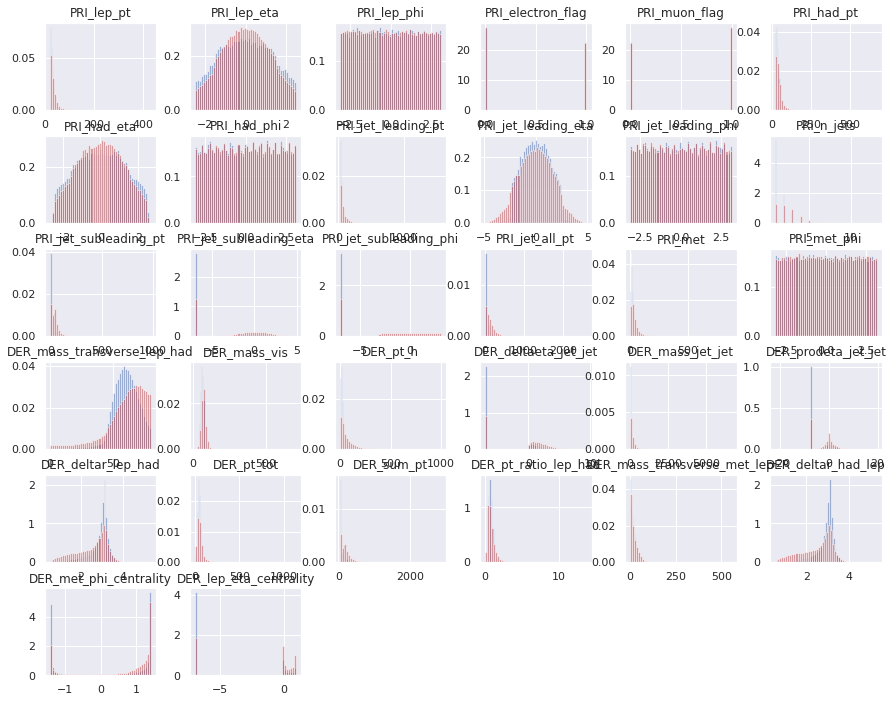

In [11]:
Train_data_vis.histogram_dataset()

Signal feature  correlation matrix


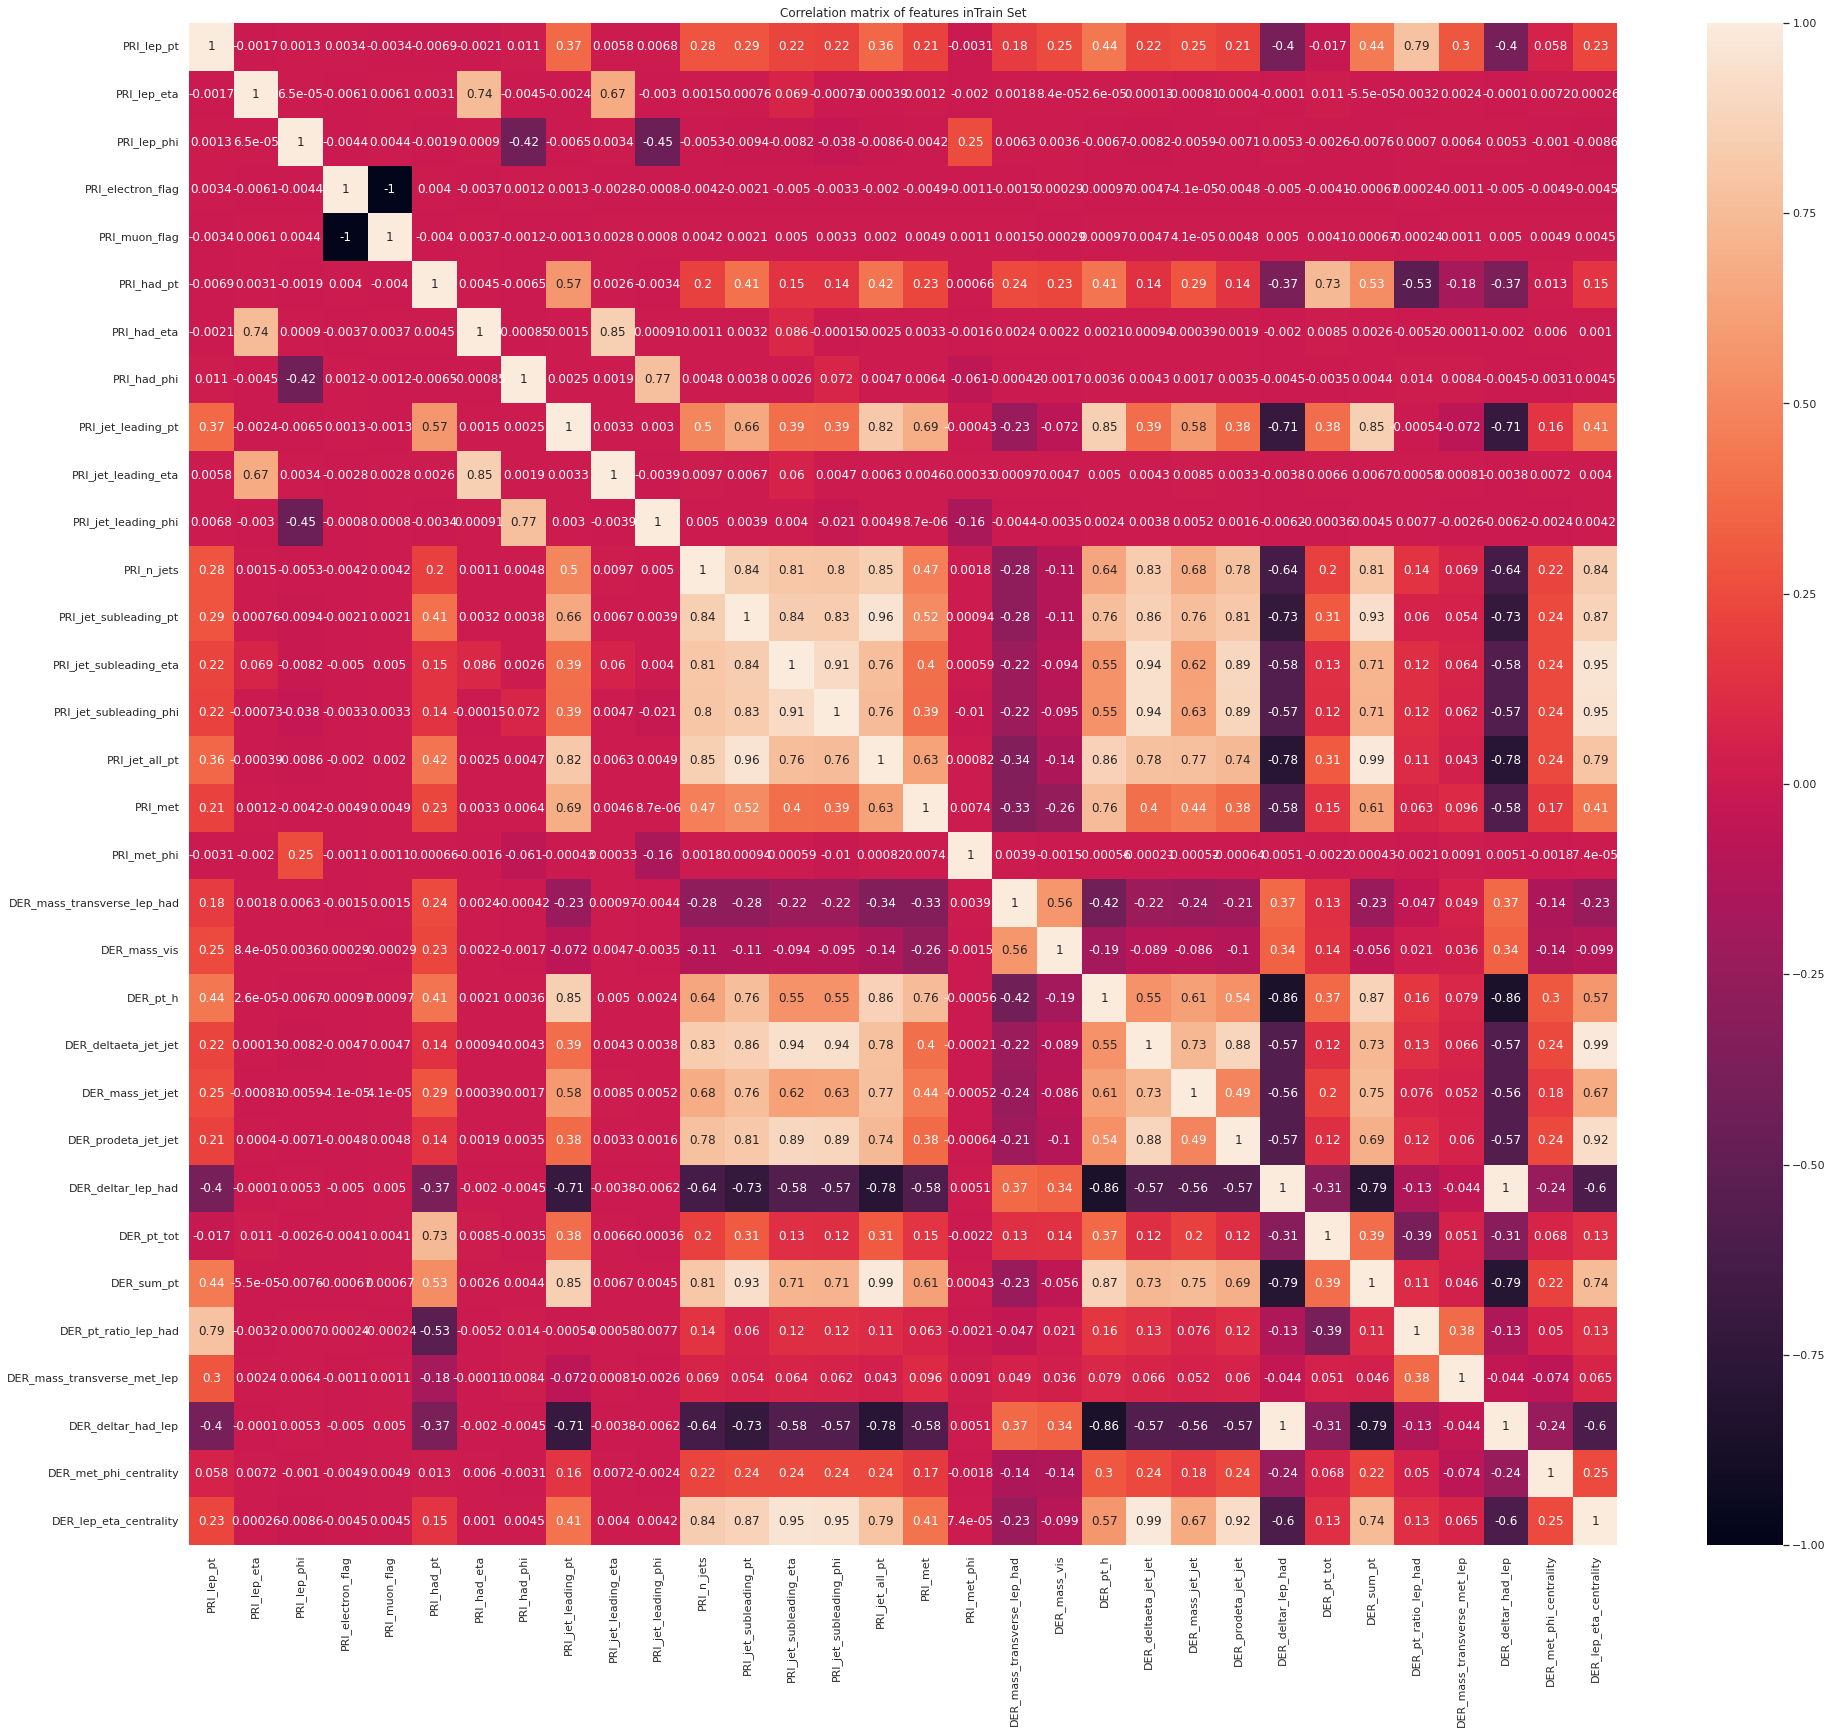

Background feature  correlation matrix


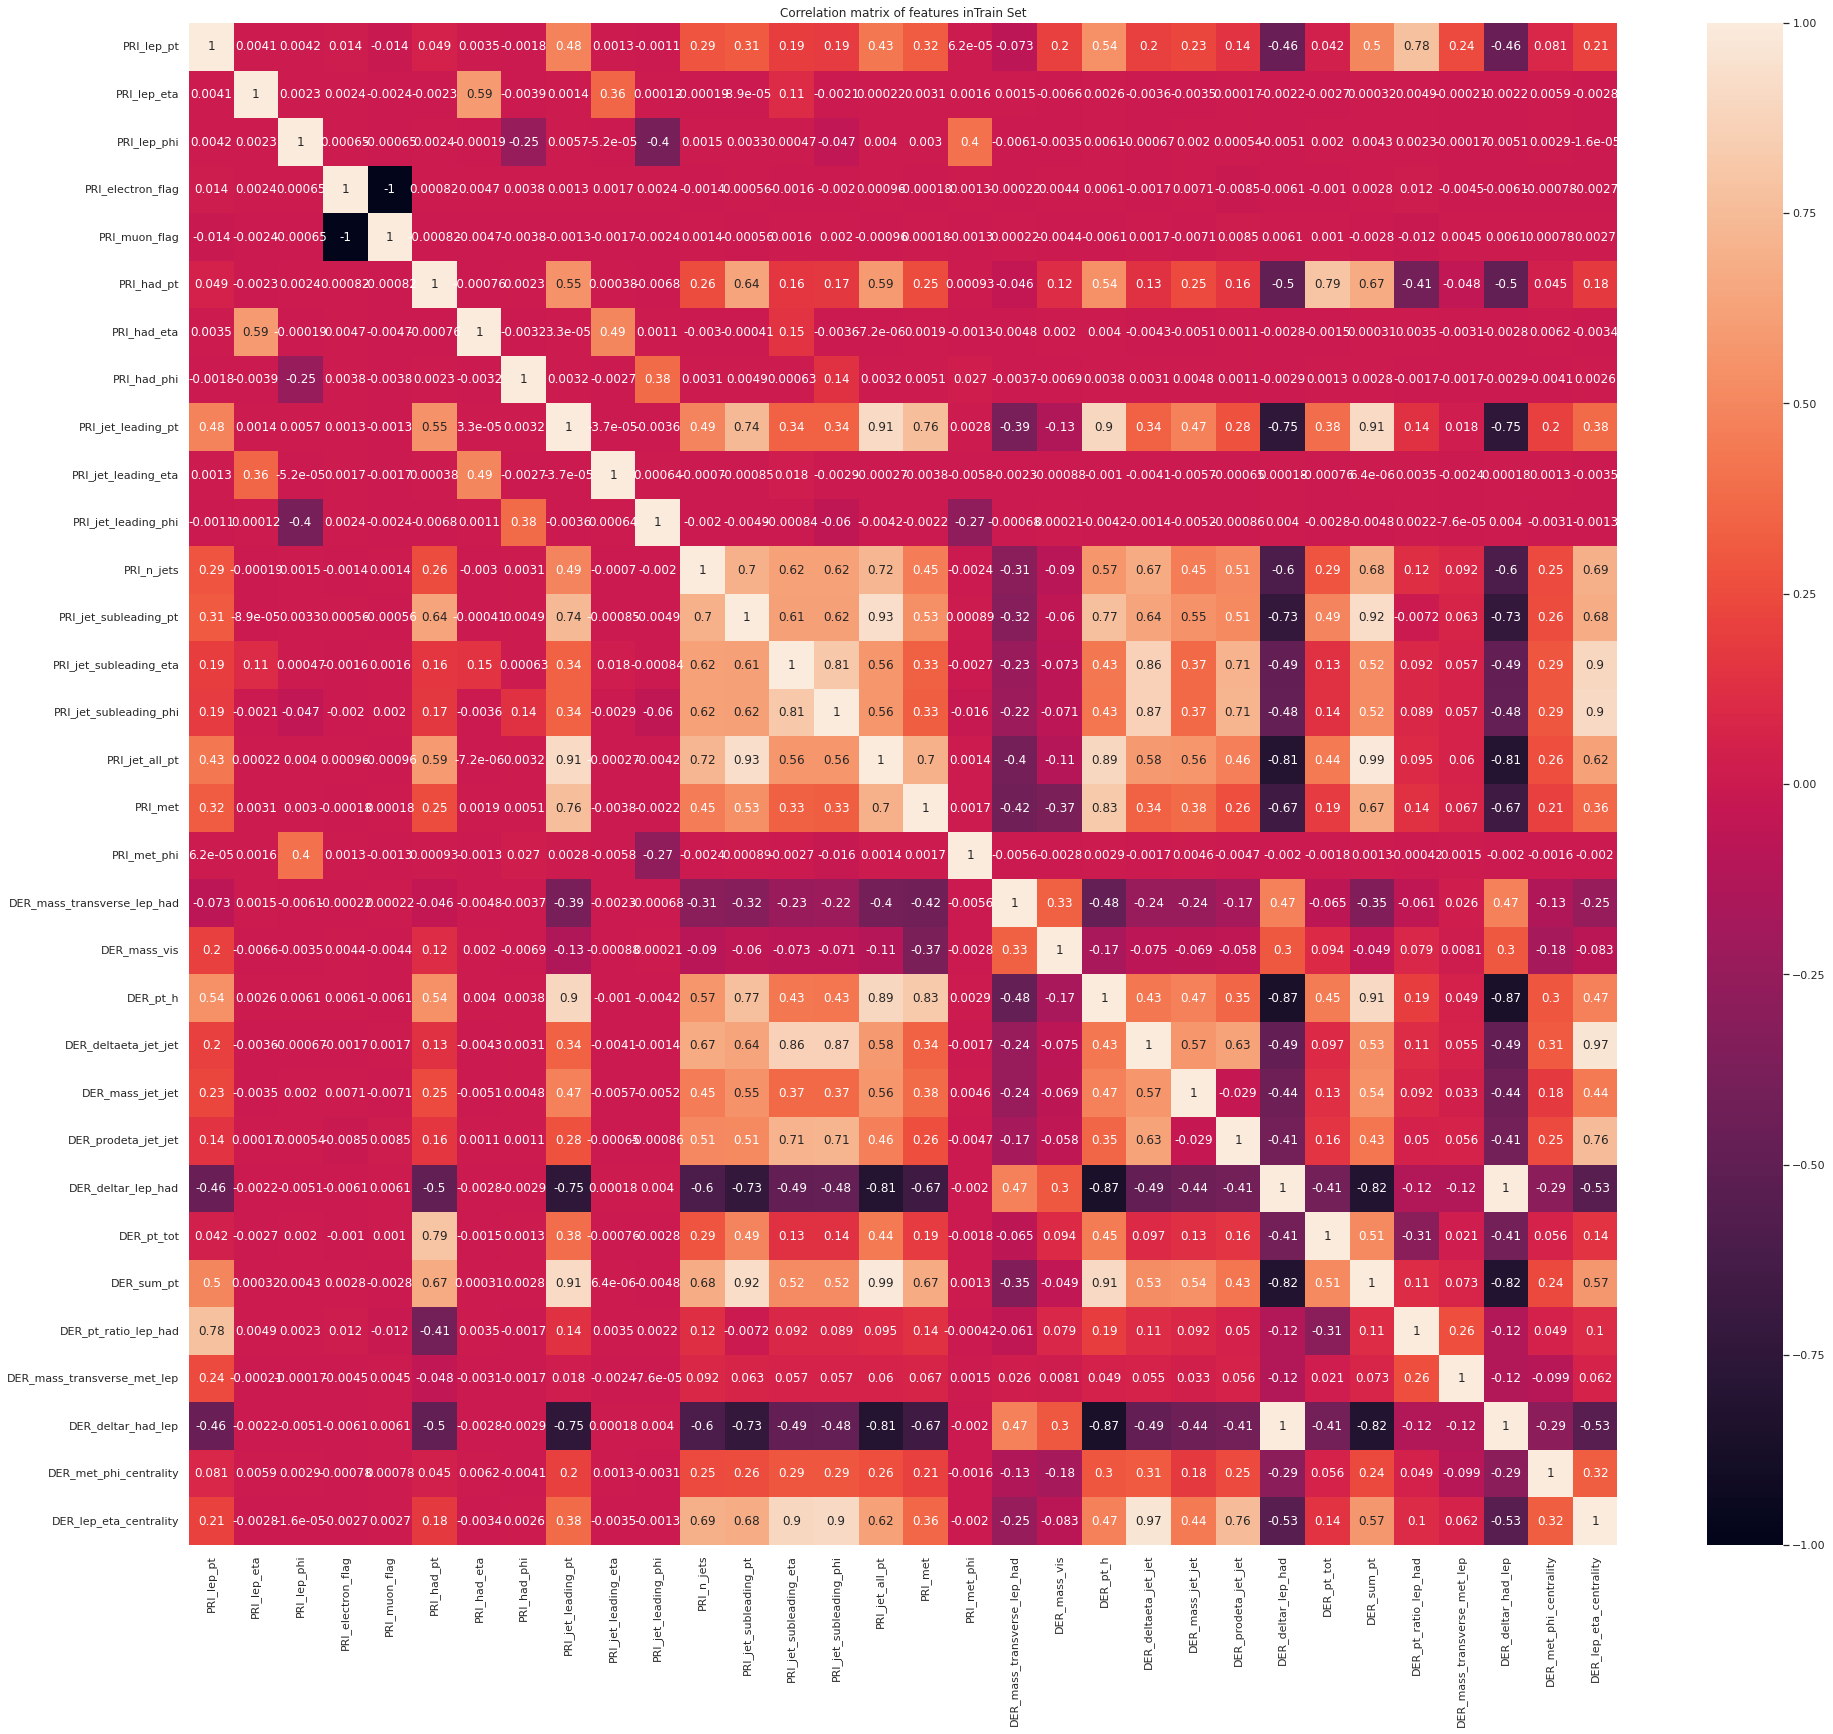

In [12]:
Train_data_vis.correlation_plots()

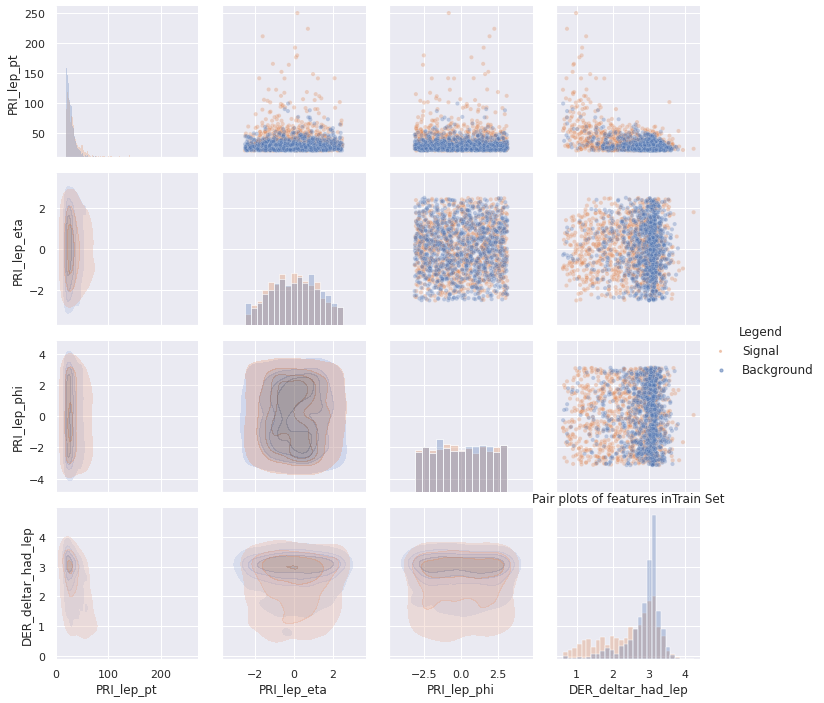

In [13]:
Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [14]:
# Train_data_vis.cluster_plot(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])

In [15]:
# n = 1
# for i in range(n):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [16]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()


model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 0.99
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.810200001
sum of background 2860861.8102000006
[0]	validation_0-logloss:0.60326	validation_0-auc:0.83705	validation_1-logloss:0.61634	validation_1-auc:0.50015
[1]	validation_0-logloss:0.55481	validation_0-auc:0.84584	validation_1-logloss:0.62140	validation_1-auc:0.41888
[2]	validation_0-logloss:0.52557	validation_0-auc:0.84898	validation_1-logloss:0.63917	validation_1-auc:0.41022
[3]	validation_0-logloss:0.50787	validation_0-auc:0.85141	validation_1-logloss:0.63316	validation_1-auc:0.42226
[4]	validation_0-logloss:0.49493	validation_0-auc:0.85400	validation_1-logloss:0.64219	validation_1-auc:0.41363
[5]	validation_0-logloss:0.48619	validation_0-auc:0.85615	validation_1-logloss:0.66708	validation_1-auc:0.41494
[6]	validat

[70]	validation_0-logloss:0.41009	validation_0-auc:0.89447	validation_1-logloss:1.64678	validation_1-auc:0.57419
[71]	validation_0-logloss:0.40910	validation_0-auc:0.89503	validation_1-logloss:1.64245	validation_1-auc:0.57543
[72]	validation_0-logloss:0.40864	validation_0-auc:0.89528	validation_1-logloss:1.64708	validation_1-auc:0.57520
[73]	validation_0-logloss:0.40805	validation_0-auc:0.89565	validation_1-logloss:1.64305	validation_1-auc:0.57175
[74]	validation_0-logloss:0.40728	validation_0-auc:0.89607	validation_1-logloss:1.65170	validation_1-auc:0.58669
[75]	validation_0-logloss:0.40665	validation_0-auc:0.89642	validation_1-logloss:1.65621	validation_1-auc:0.58626
[76]	validation_0-logloss:0.40587	validation_0-auc:0.89690	validation_1-logloss:1.65430	validation_1-auc:0.58620
[77]	validation_0-logloss:0.40567	validation_0-auc:0.89697	validation_1-logloss:1.64351	validation_1-auc:0.58363
[78]	validation_0-logloss:0.40507	validation_0-auc:0.89733	validation_1-logloss:1.63683	validati

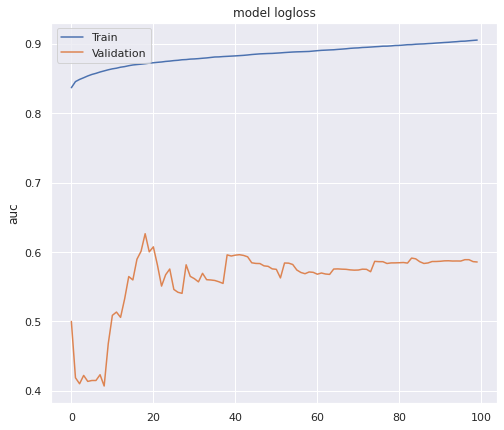

In [17]:
results = model.model.evals_result()

validationcurve(results,'auc')

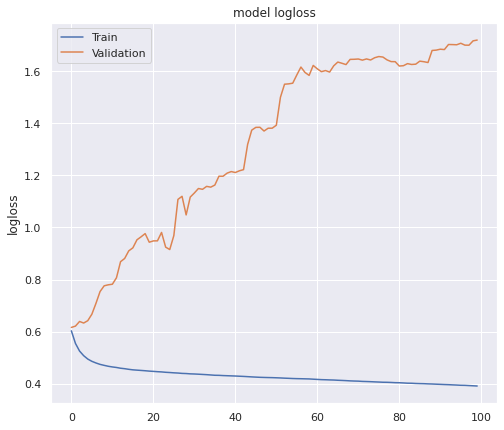

In [18]:
validationcurve(results,'logloss')

In [19]:
# lgb.plot_metric(results)

In [20]:
# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Calling predict method of submitted model
[*] - Testing
[*] - Computing Test result

[*] --- AUC test : 0.8576589690640988
[*] --- total weight test: 2871156.1554242065
[*] --- total weight train: 2870527.8620537147


NameError: name 'mu_cals_set' is not defined

## Visualise Model

In [ ]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


In [ ]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [ ]:
i = 0
for valid_set in model.validation_sets:
    roc_curve_(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(valid_set['score'],valid_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [ ]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

## End